<a href="https://colab.research.google.com/github/LeydLayd/air-quality-linear-regression/blob/main/CalidadDelAire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('/content/AireDataset.csv')


In [ ]:
df1

,MonoxidoDeCarbono,Fecha,Hora,ValorCarbono,Unidad,Ozono,Fecha.1,Hora.1,ValorOzono,Unidad.1,DioxidoDeNitrogeno,Fecha.2,Hora.2,ValorNitrogeno,Unidad.2
0,CO,01/04/2023,23:00 - 0:00,1.08,ppm,O3,01/04/2023,23:00 - 0:00,0.025,ppm,NO2,01/04/2023,23:00 - 0:00,0.028,ppm
1,CO,01/04/2023,0:00 - 1:00,1.05,ppm,O3,01/04/2023,0:00 - 1:00,0.030,ppm,NO2,01/04/2023,0:00 - 1:00,0.023,ppm
2,CO,01/04/2023,1:00 - 2:00,1.07,ppm,O3,01/04/2023,1:00 - 2:00,0.023,ppm,NO2,01/04/2023,1:00 - 2:00,0.026,ppm
3,CO,01/04/2023,2:00 - 3:00,1.12,ppm,O3,01/04/2023,2:00 - 3:00,0.018,ppm,NO2,01/04/2023,2:00 - 3:00,0.026,ppm
4,CO,01/04/2023,3:00 - 4:00,1.17,ppm,O3,01/04/2023,3:00 - 4:00,0.010,ppm,NO2,01/04/2023,3:00 - 4:00,0.032,ppm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,CO,01/05/2023,18:00 - 19:00,1.00,ppm,O3,01/05/2023,18:00 - 19:00,0.046,ppm,NO2,01/05/2023,18:00 - 19:00,0.007,ppm
712,CO,01/05/2023,19:00 - 20:00,1.04,ppm,O3,01/05/2023,19:00 - 20:00,0.043,ppm,NO2,01/05/2023,19:00 - 20:00,0.009,ppm
713,CO,01/05/2023,20:00 - 21:00,1.08,ppm,O3,01/05/2023,20:00 - 21:00,0.038,ppm,NO2,01/05/2023,20:00 - 21:00,0.011,ppm
714,CO,01/05/2023,21:00 - 22:00,1.11,ppm,O3,01/05/2023,21:00 - 22:00,0.035,ppm,NO2,01/05/2023,21:00 - 22:00,0.009,ppm


In [ ]:
df1=df1.drop('Unidad', axis=1)
df1=df1.drop('Unidad.1', axis=1)
df1= df1.drop('Unidad.2', axis=1)
df1= df1.drop('MonoxidoDeCarbono', axis=1)
df1= df1.drop('Ozono', axis=1)
df1=df1.drop('DioxidoDeNitrogeno',axis=1)
df1=df1.drop('Fecha.1', axis=1)
df1=df1.drop('Fecha.2',axis=1)
df1=df1.drop('Hora.1', axis=1)
df1=df1.drop('Hora.2',axis=1)

In [ ]:
df1

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
0,01/04/2023,23:00 - 0:00,1.08,0.025,0.028
1,01/04/2023,0:00 - 1:00,1.05,0.030,0.023
2,01/04/2023,1:00 - 2:00,1.07,0.023,0.026
3,01/04/2023,2:00 - 3:00,1.12,0.018,0.026
4,01/04/2023,3:00 - 4:00,1.17,0.010,0.032
...,...,...,...,...,...
711,01/05/2023,18:00 - 19:00,1.00,0.046,0.007
712,01/05/2023,19:00 - 20:00,1.04,0.043,0.009
713,01/05/2023,20:00 - 21:00,1.08,0.038,0.011
714,01/05/2023,21:00 - 22:00,1.11,0.035,0.009


In [ ]:
df=df1[['ValorCarbono','ValorOzono','ValorNitrogeno']]
df

,ValorCarbono,ValorOzono,ValorNitrogeno
0,1.08,0.025,0.028
1,1.05,0.030,0.023
2,1.07,0.023,0.026
3,1.12,0.018,0.026
4,1.17,0.010,0.032
...,...,...,...
711,1.00,0.046,0.007
712,1.04,0.043,0.009
713,1.08,0.038,0.011
714,1.11,0.035,0.009


In [ ]:
df.corr()

,ValorCarbono,ValorOzono,ValorNitrogeno
ValorCarbono,1.000000,-0.494896,0.708844
ValorOzono,-0.494896,1.000000,-0.712368
ValorNitrogeno,0.708844,-0.712368,1.000000


#Correlacion de las variables

In [ ]:
Carbono = df.ValorCarbono
Ozono = df.ValorOzono
Nitrogeno = df.ValorNitrogeno

In [ ]:
maximo_carbono=Carbono.max()
maximo_carbono

2.13

In [ ]:
df1[df1.ValorCarbono==2.13]

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
605,27/04/2023,8:00 - 9:00,2.13,0.006,0.036


In [ ]:
minimo_carbono=Carbono.min()
minimo_carbono

0.72

In [ ]:
df1[df1.ValorCarbono==0.72]

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
16,01/04/2023,15:00 - 16:00,0.72,0.057,0.008


In [ ]:
maximo_ozono=Ozono.max()
maximo_ozono

0.075

In [ ]:
df1[df1.ValorOzono==0.075]

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
108,05/04/2023,12:00 - 13:00,1.15,0.075,0.014


In [ ]:
minimo_ozono=Ozono.min()
minimo_ozono

0.001

In [ ]:
df1[df1.ValorOzono== 0.001]

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
221,10/04/2023,5:00 - 6:00,0.99,0.001,0.020
222,10/04/2023,6:00 - 7:00,1.18,0.001,0.024
245,11/04/2023,5:00 - 6:00,1.02,0.001,0.019
246,11/04/2023,6:00 - 7:00,1.10,0.001,0.019
414,19/04/2023,5:00 - 6:00,1.18,0.001,0.029


In [ ]:
maximo_nitrogeno= Nitrogeno.max()
maximo_nitrogeno

0.048

In [ ]:
df1[df1.ValorNitrogeno==0.048]

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
94,04/04/2023,22:00 - 23:00,1.21,0.01,0.048


In [ ]:
minimo_nitrogeno= Nitrogeno.min()
minimo_nitrogeno

0.005

In [ ]:
df1[df1.ValorNitrogeno==0.005]

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
157,07/04/2023,13:00 - 14:00,0.84,0.044,0.005
685,30/04/2023,16:00 - 17:00,0.97,0.049,0.005
706,01/05/2023,13:00 - 14:00,1.00,0.049,0.005
707,01/05/2023,14:00 - 15:00,0.97,0.048,0.005
708,01/05/2023,15:00 - 16:00,0.96,0.047,0.005


#Media de las variables

In [ ]:
df.mean()

,0
ValorCarbono,1.099092
ValorOzono,0.031675
ValorNitrogeno,0.015816


#Varianza de la variables

In [ ]:
df.var()

,0
ValorCarbono,0.042582
ValorOzono,0.000294
ValorNitrogeno,0.000065


#Desviacion estandar de las variables

In [ ]:
df.std()

,0
ValorCarbono,0.206355
ValorOzono,0.017138
ValorNitrogeno,0.008043


#Carbono/Ozono
No se encontro una correlacion grande entre los niveles de Ozono y Carbono

In [ ]:
np.corrcoef(Carbono,Ozono)

array([[ 1.        , -0.49489562],
       [-0.49489562,  1.        ]])

#Carbono/Nitrogeno
Hay una relacion grande entre los niveles de Carbono y nitrogeno

In [ ]:
np.corrcoef(Ozono,Nitrogeno)

array([[ 1.        , -0.71236772],
       [-0.71236772,  1.        ]])

In [ ]:
np.corrcoef(Carbono,Nitrogeno)

array([[1.        , 0.70884371],
       [0.70884371, 1.        ]])

In [ ]:
df.cov()

,ValorCarbono,ValorOzono,ValorNitrogeno
ValorCarbono,0.042582,-0.001750,0.001177
ValorOzono,-0.001750,0.000294,-0.000098
ValorNitrogeno,0.001177,-0.000098,0.000065


Text(0, 0.5, 'Nitrogeno')

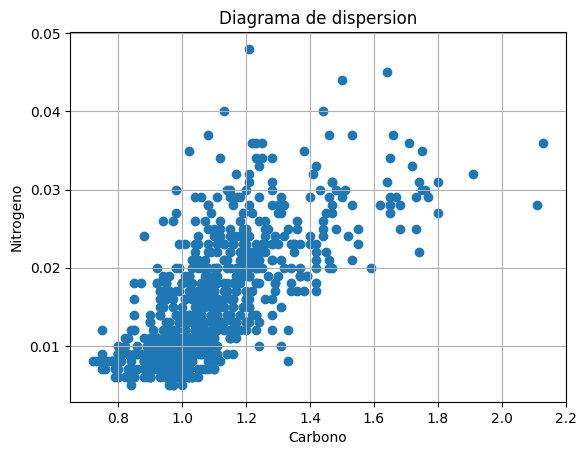

In [ ]:
plt.scatter(Carbono,Nitrogeno)
plt.grid()
plt.title("Diagrama de dispersion")
plt.xlabel('Carbono')
plt.ylabel('Nitrogeno')

In [ ]:
Cov1 = np.cov(Carbono,Nitrogeno)
Cov1

array([[4.25822516e-02, 1.17653170e-03],
       [1.17653170e-03, 6.46960347e-05]])

In [ ]:
m = Cov1[0,1]/np.var(Carbono)
m

0.027668269212895384

In [ ]:
b= Nitrogeno.mean()-m*Carbono.mean()
b

-0.01459433583392182

#Prediccion
Para una prediccion se tomo como nivel de carbono en 1.25 y se encontro que el nivel de nitrogeno sera de 0.01999

Se a señalizado la prediccion en la recta con un punto rojo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()
reg.fit(Carbono.values.reshape(-1,1),Nitrogeno)
m=reg.coef_
m

array([0.02762963])

In [ ]:
b=reg.intercept_
b

-0.014551863797201147

Text(0, 0.5, 'Nitrogeno')

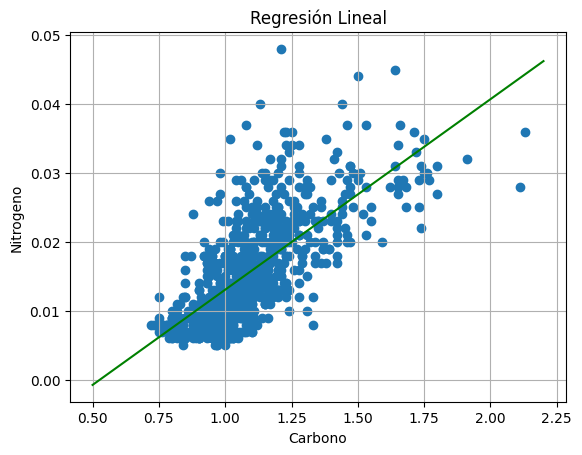

In [ ]:
plt.scatter(Carbono,Nitrogeno)
x = np.arange(0.5,2.2,0.01)
y = m*x+b
plt.plot(x,y,'g')
plt.grid()
plt.title("Regresión Lineal")
plt.xlabel('Carbono')
plt.ylabel('Nitrogeno')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
reg.score(Carbono.values.reshape(-1,1),Nitrogeno)

0.5024594092953749

In [ ]:
reg.predict([[1.25]])

array([0.01998517])

#Ozono/Nitrogeno
Se entontro una fuerte relacion entre el Ozono y el Nitrogeno por lo cual se hizo un analisi de estas variables,sin embargo la relacion de estas variables fue inversa

In [ ]:
np.corrcoef(Ozono,Nitrogeno)

array([[ 1.        , -0.71236772],
       [-0.71236772,  1.        ]])

In [ ]:
Cov2 = np.cov(Ozono,Nitrogeno)
Cov2

array([[ 2.93705143e-04, -9.81971403e-05],
       [-9.81971403e-05,  6.46960347e-05]])

Text(0, 0.5, 'Ozono')

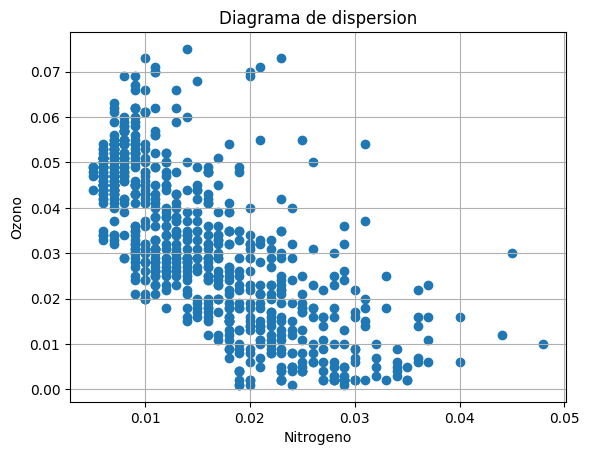

In [ ]:
plt.scatter(Nitrogeno,Ozono)
plt.grid()
plt.title("Diagrama de dispersion")
plt.xlabel('Nitrogeno')
plt.ylabel('Ozono')

In [ ]:
m2 = Cov2[0,1]/np.var(Nitrogeno)
m2

-1.5199459969444717

In [ ]:
b2 = Ozono.mean()-m2*Nitrogeno.mean()
b2

0.05571350344888157

In [ ]:
p2 = m2*0.015+b2
p2

0.03291431349471449

#Prediccion
Para la prediccion se tomo como nivel de nitrogeno 0.015 y nos arrojo que el ozono bajaria un 0.032

Se a señalado la prediccion en la recta con un punto rojo

In [ ]:
reg2=LinearRegression()
reg2.fit(Nitrogeno.values.reshape(-1,1),Ozono)
m2=reg2.coef_
m2

array([-1.51782317])

In [ ]:
b2=reg2.intercept_
b2

0.05567992953485467

In [ ]:
reg2.score(Nitrogeno.values.reshape(-1,1),Ozono)

0.507467771535489

Text(0, 0.5, 'Ozono')

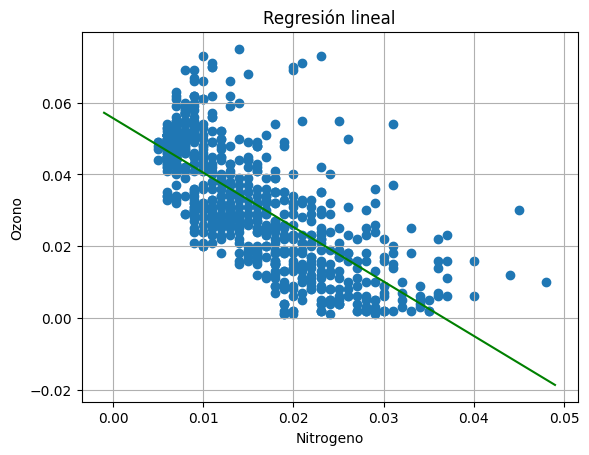

In [ ]:
plt.scatter(Nitrogeno,Ozono)
x2 = np.arange(-0.001,0.05,0.01)
y2 = m2*x2 + b2
plt.plot(x2,y2,'g')
plt.grid()
plt.title("Regresión lineal")
plt.xlabel('Nitrogeno')
plt.ylabel('Ozono')

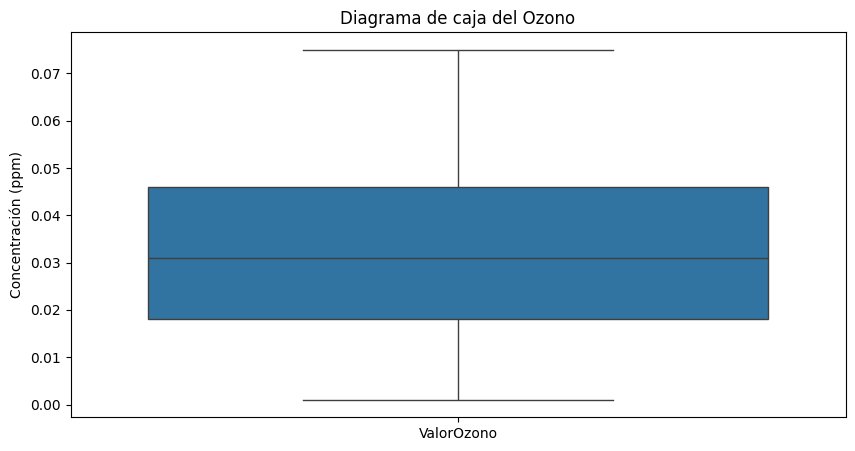

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['ValorOzono']])
plt.title("Diagrama de caja del Ozono")
plt.ylabel("Concentración (ppm)")
plt.show()


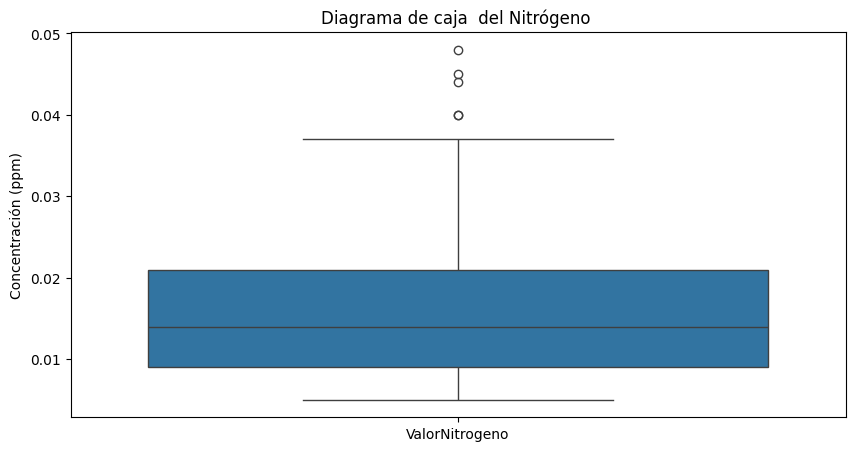

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['ValorNitrogeno']])
plt.title("Diagrama de caja  del Nitrógeno ")
plt.ylabel("Concentración (ppm)")
plt.show()

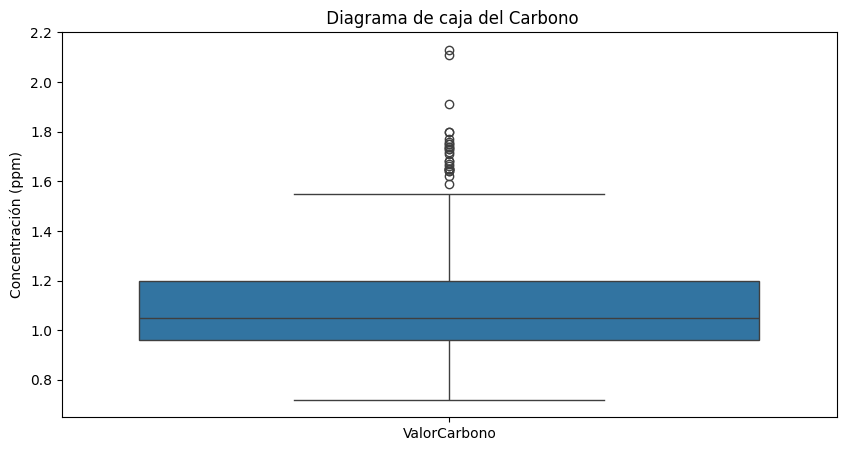

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['ValorCarbono']])
plt.title(" Diagrama de caja del Carbono")
plt.ylabel("Concentración (ppm)")
plt.show()

In [ ]:
# Función para detectar valores atípicos
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    outliers = columna[(columna < (Q1 - 1.5 * IQR)) | (columna > (Q3 + 1.5 * IQR))]
    return outliers




In [ ]:


# Aplicar la función a cada columna
outliers_ozono = detectar_outliers(df['ValorOzono'])
outliers_nitrogeno = detectar_outliers(df['ValorNitrogeno'])
outliers_carbono = detectar_outliers(df['ValorCarbono'])

print("Valores atípicos en Ozono:")
print(outliers_ozono)
print("\nValores atípicos en Nitrógeno:")
print(outliers_nitrogeno)
print("\nValores atípicos en Carbono:")
print(outliers_carbono)

Valores atípicos en Ozono:
Series([], Name: ValorOzono, dtype: float64)

Valores atípicos en Nitrógeno:
9     0.044
10    0.045
50    0.040
56    0.040
94    0.048
Name: ValorNitrogeno, dtype: float64

Valores atípicos en Carbono:
10     1.64
57     1.64
79     1.65
80     1.71
103    1.75
104    1.72
311    1.66
392    1.65
393    1.62
416    1.67
417    1.74
436    1.65
437    1.80
449    1.65
461    1.68
533    1.74
556    1.59
580    1.68
581    1.91
582    1.80
604    1.77
605    2.13
606    2.11
628    1.75
629    1.76
652    1.73
653    1.73
Name: ValorCarbono, dtype: float64


In [ ]:
df1[(df1.ValorCarbono<=1.73 )& (df1.ValorCarbono>=1.64)]

,Fecha,Hora,ValorCarbono,ValorOzono,ValorNitrogeno
10,01/04/2023,9:00 - 10:00,1.64,0.030,0.045
57,03/04/2023,9:00 - 10:00,1.64,0.037,0.031
79,04/04/2023,7:00 - 8:00,1.65,0.004,0.034
80,04/04/2023,8:00 - 9:00,1.71,0.016,0.036
104,05/04/2023,8:00 - 9:00,1.72,0.018,0.033
311,14/04/2023,22:00 - 23:00,1.66,0.011,0.037
392,18/04/2023,7:00 - 8:00,1.65,0.005,0.028
416,19/04/2023,7:00 - 8:00,1.67,0.005,0.029
436,20/04/2023,7:00 - 8:00,1.65,0.004,0.027
449,20/04/2023,20:00 - 21:00,1.65,0.013,0.029
